In [1]:
from pathlib import Path

from astropy.time import Time
from astropy.coordinates import AltAz, SkyCoord, EarthLocation
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from eigsep_observing import io
import eigsep_data as ed

%matplotlib widget

In [2]:
DATA_DIR = Path("/home/christian/Documents/research/eigsep/data-analysis/data/deployment4/corr_data/")
data = ed.EigsepData.from_path(DATA_DIR, start_time="20250719_100000")

/home/christian/Documents/research/eigsep/data-analysis/src/eigsep_data/data.py:82: UserWarning: Failed to read /home/christian/Documents/research/eigsep/data-analysis/data/deployment4/corr_data/corr_20250720_202334.h5: Unable to synchronously open file (bad object header version number). Skipping this file.
  warnings.warn(f"Failed to read {f}: {e}. Skipping this file.")


In [ ]:
plt.figure()
plt.plot(data.acc_cnt)
plt.show()

In [ ]:
data = data.slice(35000, 65000)

In [ ]:
plt.figure()
plt.plot(data.acc_cnt)
plt.show()

In [ ]:
plt.figure()
plt.plot(data.times - data.times[0])
plt.show()

In [ ]:
plt.figure()
plt.plot(np.diff(data.acc_cnt))
plt.show()

In [ ]:
d2 = data.data["2"]
print(d2.shape)

In [ ]:
plt.figure()
plt.imshow(np.log10(d2), aspect="auto", interpolation="none", cmap="plasma", vmin=3, vmax=6)
plt.colorbar()
plt.show()

## Point Sources

In [12]:
if True:
    np.savez("point_src_snippet.npz", data=d2, acc_cnt=data.acc_cnt, times=data.times, freq=np.array(data.freq))

In [17]:
from datetime import datetime
dts = [datetime.fromtimestamp(t) for t in data.times]

In [20]:
LAT = 39.2477
LON = -113.4033

def sources(lon_deg, lat_deg, times):
    """
    lon_deg, lat_deg: observer longitude (East +) and latitude in degrees
    time: must be able to instantiate astropy.Time
    """
    loc = EarthLocation(lat=lat_deg*u.deg, lon=lon_deg*u.deg)
    obstime = Time(times)
    altaz_frame = AltAz(obstime=obstime, location=loc)

    results = {}
    for name in ["Cyg A", "Cas A", "Vir A"]:
        c = SkyCoord.from_name(name).transform_to(altaz_frame)
        results[name] = c.alt.to(u.deg).value
    return results

alts = sources(LON, LAT, dts)

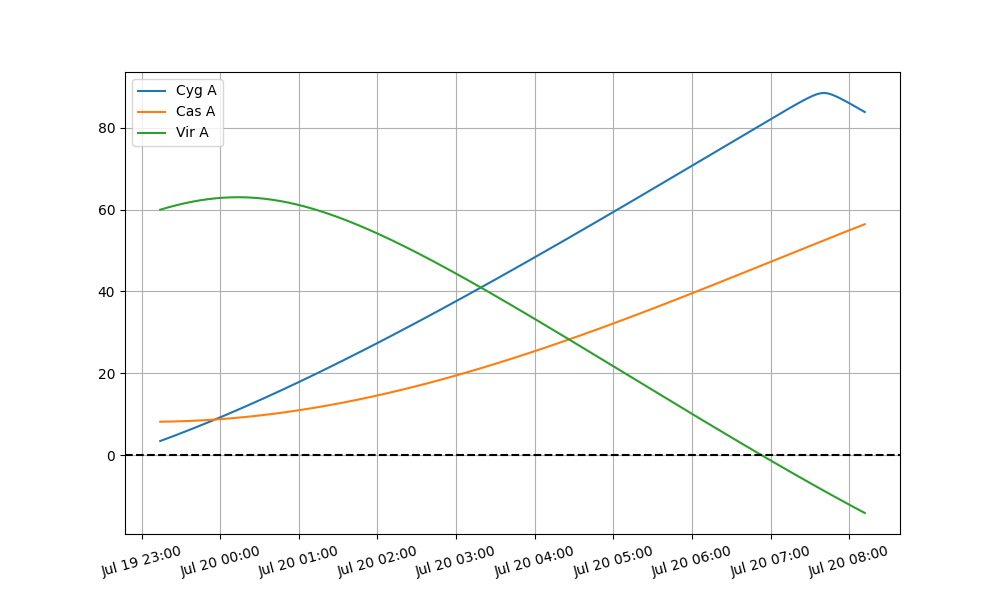

In [33]:
plt.figure(figsize=(10, 6))
for k, v in alts.items():
    plt.plot(dts, v, label=k)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))
plt.xticks(rotation=15)
plt.grid()
plt.axhline(0, ls="--", c="k")
plt.legend()
plt.show()

## Transmitter

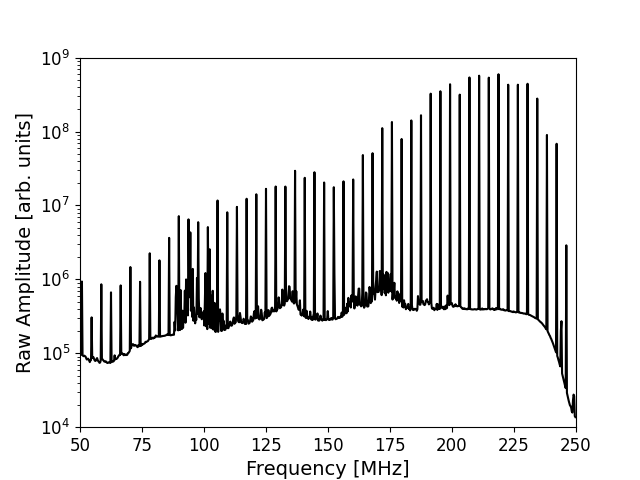

In [8]:
plt.figure()
plt.plot(data.freq, d2[0].T, c="k")
plt.yscale("log")
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Raw Amplitude [arb. units]", fontsize=14)
plt.gca().tick_params(axis='both', labelsize=12)
plt.xlim(50, 250)
plt.ylim(1e4, 1e9)
plt.show()

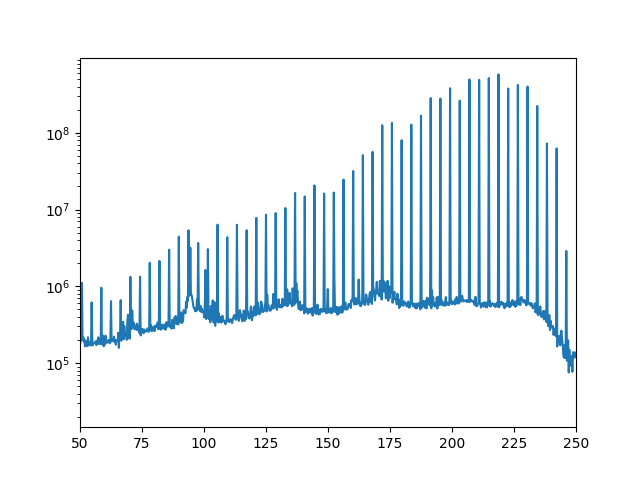

In [9]:
plt.figure()
plt.plot(data.freq, np.mean(d2, axis=0))
plt.yscale("log")
plt.xlim(50, 250)
plt.show()